## Routing

### Importations

In [18]:
from langchain_core.messages import HumanMessage, AIMessage
from pprint import pprint
from dotenv import load_dotenv
import os

### Ignore Warnings

In [19]:
%reload_ext dotenv
%dotenv

### Creating Tools

In [20]:
def addition(a: int, b:int) -> int:
    """Use this tool to add two integer numbers"""
    return a+b

### Binding Tools To Chat Model

In [21]:
from langchain_openai import ChatOpenAI

In [22]:
model = ChatOpenAI(temperature=0.0, model="gpt-4o-mini", api_key=os.getenv("OPENAI_API_KEY"))

In [23]:
model_with_tools = model.bind_tools([addition])

### Creating Graph

In [24]:
from langgraph.graph import StateGraph, START, END, MessageGraph, MessagesState
from langgraph.prebuilt import ToolNode, tools_condition


### Tool Node

In [25]:
def tool_calling_node(state: MessagesState):
    return {"messages": model_with_tools.invoke(state["messages"])}

### Building Graph

In [26]:
builder = StateGraph(MessagesState)

builder.add_node("tool_calling_node", tool_calling_node)
builder.add_node("tools", ToolNode([addition]))

builder.add_edge(START, "tool_calling_node")
builder.add_conditional_edges(
    "tool_calling_node",
    tools_condition
)

builder.add_edge("tools", END)
graph = builder.compile()

### Visualization

In [27]:
from IPython.display import display, Image

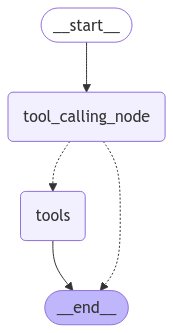

In [28]:
display(Image(graph.get_graph().draw_mermaid_png()))

### Invoking Graph

In [29]:
messages = [HumanMessage(content="What is the sum of 20 and 40 ?", name="Rutvik")]

messages = graph.invoke({"messages": messages})

In [30]:
for msg in messages["messages"]:
    msg.pretty_print()

================================ Human Message =================================
Name: Rutvik

What is the sum of 20 and 40 ?
================================== Ai Message ==================================
Tool Calls:
  addition (call_Hw3EetMoNddEprHqFHGQLptY)
 Call ID: call_Hw3EetMoNddEprHqFHGQLptY
  Args:
    a: 20
    b: 40
================================= Tool Message =================================
Name: addition

60


In [31]:
messages = [HumanMessage(content="What is the capital of India ?", name="Rutvik")]

messages = graph.invoke({"messages": messages})

In [32]:
for msg in messages["messages"]:
    msg.pretty_print()

================================ Human Message =================================
Name: Rutvik

What is the capital of India ?
================================== Ai Message ==================================

The capital of India is New Delhi.
